**Importing necessary libraries for the work flow

In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# package to read DICOM image
import pydicom 
# package to extract and convert the arrays
from PIL.Image import fromarray 
from PIL import Image
import cv2
from scipy import ndimage
from skimage import measure,color,io
import pandas as pd

**Reading DICOM image and saving it in jpg format

In [59]:
# read dicom image
dataset = pydicom.dcmread('C:/Users/brint/Documents/GitHub/particlesize/28668950')

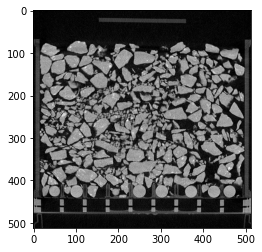

In [60]:
# visualise dicom image in gray scale
plt.imshow(dataset.pixel_array,cmap='gray')
plt.show()

In [61]:
# extract the pixel array as float, to reduce loss of data 
new_image = dataset.pixel_array.astype(float)

In [62]:
# rescale the pixels of the image between 0 to 255 
scaled_image = (np.maximum(new_image, 0) / new_image.max()) * 255.0

In [63]:
# convert scaled image to 8 bits unsigned integer
scaled_image = np.uint8(scaled_image)
final_image = Image.fromarray(scaled_image)

In [64]:
# save the image as jpg
final_image.save('C:/Users/brint/Documents/GitHub/particlesize/image.jpg')

**Cropping the stduy area

In [65]:
# read image for opencv works
img=cv2.imread('C:/Users/brint/Documents/GitHub/particlesize/image.jpg',0)

In [66]:
# get dimensions of image (original)
dim_org = img.shape 
dim_org

(512, 512)

In [67]:
# crop study area
crop_img=img[70:412,15:498]

In [68]:
dim_crop = crop_img.shape
dim_crop

(342, 483)

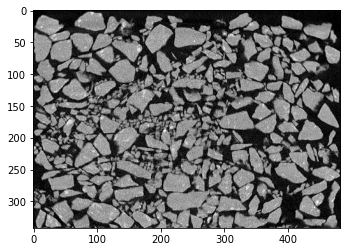

In [69]:
plt.imshow(crop_img,cmap='gray')
plt.show()

In [70]:
# creating conversion unit from pixel to mm 
px_mm = 0.55

(array([7.754e+03, 1.113e+03, 1.138e+03, 1.227e+03, 1.290e+03, 1.330e+03,
        1.351e+03, 1.370e+03, 1.319e+03, 1.361e+03, 1.273e+03, 1.298e+03,
        1.317e+03, 1.284e+03, 1.352e+03, 1.263e+03, 1.246e+03, 1.239e+03,
        1.122e+03, 1.248e+03, 1.209e+03, 1.158e+03, 1.126e+03, 1.101e+03,
        1.102e+03, 1.014e+03, 1.015e+03, 9.810e+02, 9.520e+02, 9.820e+02,
        8.980e+02, 8.910e+02, 8.570e+02, 8.500e+02, 8.240e+02, 7.550e+02,
        8.150e+02, 7.410e+02, 7.100e+02, 6.460e+02, 6.820e+02, 6.280e+02,
        5.970e+02, 5.600e+02, 6.090e+02, 5.880e+02, 5.660e+02, 5.620e+02,
        5.120e+02, 5.160e+02, 4.680e+02, 4.880e+02, 4.420e+02, 4.360e+02,
        4.440e+02, 4.530e+02, 4.170e+02, 4.180e+02, 4.070e+02, 3.950e+02,
        4.000e+02, 3.800e+02, 3.430e+02, 3.580e+02, 3.830e+02, 3.490e+02,
        3.430e+02, 3.590e+02, 3.550e+02, 3.350e+02, 3.320e+02, 3.110e+02,
        3.320e+02, 3.620e+02, 3.360e+02, 3.000e+02, 2.870e+02, 2.900e+02,
        3.370e+02, 3.410e+02, 3.020e+0

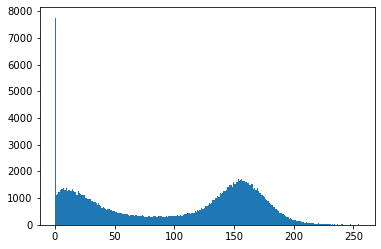

In [71]:
# understanding the manual thresholding value using histogram
plt.hist(crop_img.flat, bins=255, range=(0,255))

In [72]:
# using otsu's algorithm to threshold the image 
ret, thresh_img = cv2.threshold(crop_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret

90.0

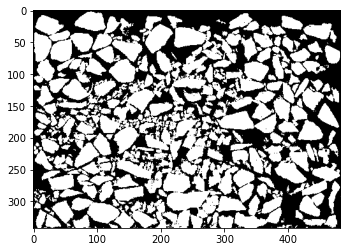

In [73]:
plt.imshow(thresh_img,cmap='gray')
plt.show()

In [74]:
# converting uint8 to binary 
bi_img = thresh_img == 255
bi_img

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [75]:
# create a structure using 8 connectivity that uses diagonal pixels during connectivity assessment 
stru = [[1,1,1],[1,1,1],[1,1,1]]
# number grains using the 'label' function in the scipy ndimage
# get number of labels assigned
bi_label, bi_num = ndimage.label(bi_img, structure=stru)
bi_num

231

**Measuring the parameters using the regionprop function in skiimage

In [76]:
# measure the regional properties of labelled segments 
# use intital image with the same size for intensity reference 
# use cache to increase the computational efficiency 
img_measure = measure.regionprops(bi_label, crop_img,cache=True)

In [77]:
print(img_measure[0].image)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


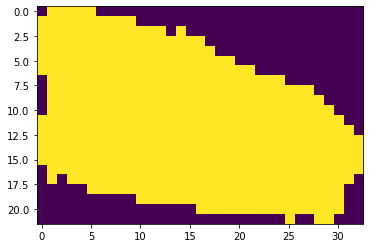

In [78]:
plt.imshow(img_measure[5].image)
plt.show()

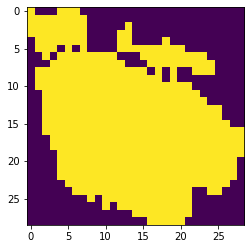

In [79]:
plt.imshow(img_measure[115].image)
plt.show()

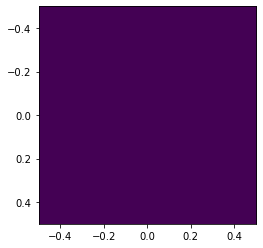

In [80]:
plt.imshow(img_measure[116].image)
plt.show()

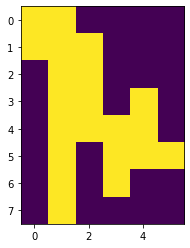

In [81]:
plt.imshow(img_measure[118].image)
plt.show()